# Data Exploration: The Daylight dataset

_Primary Author: Pete King_

This notebook contains the code we used to analyze the 'Daylight' dataset and develop associated univariate visualizations.

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
PATH = 'data/'

## Normalize daylight data

### Method: Z-score

In order to make the 'daylight' variable more amenable to statistical analysis, we first attempt to normalize its values by finding the standard deviation of each measurement from the mean value.  This transformation will be useful when we want to look for correlation between daylight hours and other variables.  Instead of measuring covariance, we can use normalized data to look for a correlation coefficient on the range [-1, 1].  Unlike with covariance measure, which is based on raw values has an unlimited range, the standard range of the correlation coefficient helps us understand the _degree_ to which data may be viewed as correlated.

_Note that we are using our 'daylight' measurement as a rough estimate for the relative amount of daylight that each individual in our primary dataset had available to them during the winter season in 2022.  We only obtained a single daylight measure on the Winter Solstice for each state, based on the geographic location its capital.  The actual daylight available to each individual will vary depending on their specific geographic location.  In some cases, such as for the state of California, which spans from 42 degrees latitude in the north to nearly 32 degrees latitude in the south, the daylight window range is significant (for California, the difference is ~9 hours at the northern border vs. ~10 hours at the southern border).  Given that we do not know the detailed geographic distirbution of the population sampled in the BRFSS for each state, it is not possible to provide a considerably more accurate measure of the amount of daylight each individual in the BRFSS had available._

_It is also a gross approximation to choose a single day of the year (the Winter Solstice) as a proxy for the amount of daylight an individual had available during the entire winter season.  However, the Winter Solstice does mark the extreme in difference between latitudes for daylight hours.  We could have taken a total of daylight hours available each day across a defined "winter season" of ~3 months centered around the Winter Solstice, but this would simply have had the effect of dampening the difference between latitudes._

_Finally, the amount of daylight each individual actually received will vary depending on their living situation (large windows in the house?), routines (how much time do they spend outside?), and other factors that we could not measure._

In [3]:
# Load dataset and change 'Daylight Hours' back to the TimeDelta data type
daylight_df = pd.read_csv(PATH + 'daylight.csv')
daylight_df['Daylight Hours'] = daylight_df['Daylight Hours'].apply(pd.Timedelta)

# Create a column for daylight hours as a floating point type
daylight_df['DH'] = daylight_df['Daylight Hours'].dt.total_seconds() / 3600

# Create a column for the normalized value:  (x - mean) / std
daylight_df['DH_Z-score'] = (daylight_df['DH']
                             - daylight_df['DH'].mean()) / daylight_df['DH'].std()
daylight_df.head()

,State,Begin Civil Twilight,Rise,Upper Transit,Set,End Civil Twilight,Daylight Hours,DH,DH_Z-score
0,AL,2022-12-21 04:15:00,2022-12-21 04:42:00,2022-12-21 09:43:00,2022-12-21 14:44:00,2022-12-21 15:11:00,0 days 10:02:00,10.033333,0.987589
1,AK,2022-12-21 08:52:00,2022-12-21 09:45:00,2022-12-21 12:56:00,2022-12-21 16:07:00,2022-12-21 17:00:00,0 days 06:22:00,6.366667,-4.379642
2,AZ,2022-12-21 06:01:00,2022-12-21 06:28:00,2022-12-21 11:26:00,2022-12-21 16:25:00,2022-12-21 16:52:00,0 days 09:57:00,9.950000,0.865607
3,AR,2022-12-21 04:45:00,2022-12-21 05:13:00,2022-12-21 10:07:00,2022-12-21 15:02:00,2022-12-21 15:30:00,0 days 09:49:00,9.816667,0.670435
4,CA,2022-12-21 06:50:00,2022-12-21 07:20:00,2022-12-21 12:04:00,2022-12-21 16:48:00,2022-12-21 17:18:00,0 days 09:28:00,9.466667,0.158108


In [4]:
daylight_df.describe()

,Daylight Hours,DH,DH_Z-score
count,52,52.000000,5.200000e+01
mean,0 days 09:21:31.153846153,9.358654,8.219920e-17
std,0 days 00:40:59.368366101,0.683158,1.000000e+00
min,0 days 06:22:00,6.366667,-4.379642e+00
25%,0 days 09:02:45,9.045833,-4.579037e-01
50%,0 days 09:21:30,9.358333,-4.691636e-04
75%,0 days 09:44:00,9.733333,5.484523e-01
max,0 days 11:03:00,11.050000,2.475776e+00


As we would expect, the daylight hours available are mostly concentrated around a central range (for the 48 contiguous states), with just a few states lieing outside (Alaska in the north; Hawaii and Puerto Rico in the south).

### Method 2: Min-Max Scaling

One aspect of the Z-score that may not be desirable is that it transforms the raw data's native distance measure into the standard deviation of the data.  When the data we are dealing with is a random sample, this may be desirable as it dampens the effect of outliers.  However, in our case, we know that Alaska and Puertro Rico are not ouliers.  More importantly, the amount of daylight a person has available each day already has a native distance measure that we may want to preserve: time.  Using a min-max scaler rather than a Z-score does a better job of preserving this native distance measure.

In [5]:
# Use scikit-learn to perform min-max scaling on the data
daylight_df['DH_min-max'] = MinMaxScaler().fit_transform(daylight_df['DH'].values.reshape(-1,1))

In [6]:
daylight_df.head()

,State,Begin Civil Twilight,Rise,Upper Transit,Set,End Civil Twilight,Daylight Hours,DH,DH_Z-score,DH_min-max
0,AL,2022-12-21 04:15:00,2022-12-21 04:42:00,2022-12-21 09:43:00,2022-12-21 14:44:00,2022-12-21 15:11:00,0 days 10:02:00,10.033333,0.987589,0.782918
1,AK,2022-12-21 08:52:00,2022-12-21 09:45:00,2022-12-21 12:56:00,2022-12-21 16:07:00,2022-12-21 17:00:00,0 days 06:22:00,6.366667,-4.379642,0.000000
2,AZ,2022-12-21 06:01:00,2022-12-21 06:28:00,2022-12-21 11:26:00,2022-12-21 16:25:00,2022-12-21 16:52:00,0 days 09:57:00,9.950000,0.865607,0.765125
3,AR,2022-12-21 04:45:00,2022-12-21 05:13:00,2022-12-21 10:07:00,2022-12-21 15:02:00,2022-12-21 15:30:00,0 days 09:49:00,9.816667,0.670435,0.736655
4,CA,2022-12-21 06:50:00,2022-12-21 07:20:00,2022-12-21 12:04:00,2022-12-21 16:48:00,2022-12-21 17:18:00,0 days 09:28:00,9.466667,0.158108,0.661922


In [7]:
daylight_df.describe()

,Daylight Hours,DH,DH_Z-score,DH_min-max
count,52,52.000000,5.200000e+01,52.000000
mean,0 days 09:21:31.153846153,9.358654,8.219920e-17,0.638858
std,0 days 00:40:59.368366101,0.683158,1.000000e+00,0.145870
min,0 days 06:22:00,6.366667,-4.379642e+00,0.000000
25%,0 days 09:02:45,9.045833,-4.579037e-01,0.572064
50%,0 days 09:21:30,9.358333,-4.691636e-04,0.638790
75%,0 days 09:44:00,9.733333,5.484523e-01,0.718861
max,0 days 11:03:00,11.050000,2.475776e+00,1.000000


## Visualize the dataset

A histogram of the data for daylight hours will help us to better understand the degree of variation in the data set.

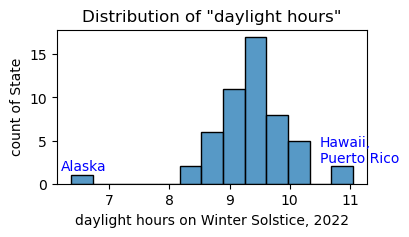

In [8]:
# Use matplotlib 'explicit style' syntax to create a figure and Axes object
figure = plt.figure(figsize=(4, 2))
ax1 = figure.subplots()
ax1 = sns.histplot(data=daylight_df[['State', 'DH']],
                  x='DH'
                  )

ax1.set(title='Distribution of "daylight hours"',
       xlabel='daylight hours on Winter Solstice, 2022',
       ylabel='count of State'
       )

# Annotate to highlight Alaska, Hawaii, & Puerto Rico
plt.text(x=6.2, y=1.5, s='Alaska', color='blue')
plt.text(x=10.5, y=2.5, s='Hawaii,\nPuerto Rico', color='blue')

plt.show()

In [9]:
# Write dataframe to disk for further analysis
daylight_df.to_csv(PATH + 'daylight_transformed.csv', index=False)

**How this Notebook fits in with our larger analysis:**

When it came time to merge the two databases, we ended up not using either the Z-score or the Min-Max score calculated here.  Instead, we assigned a raw number of hours ('DH_float') to each individual based on that person's state of residence.  When then calculated a Z-score for both 'Daylight Hours' and the 'Depression Index' (DI) in the merged dataframe.  This ensured that each variable was normalized appropriately to zero mean and unit variance _for the entire merged dataset._

## Record Dependencies

In [10]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2025-02-16T19:01:01.896205+00:00

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.17.2

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 6.5.0-1020-aws
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit

seaborn   : 0.12.2
pandas    : 2.0.2
numpy     : 1.24.3
sklearn   : 1.2.2
matplotlib: 3.7.1

